# Pizza Sales Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

## Data preparation and Processing 

In [2]:
df=pd.read_csv('pizza_sales_data.csv')

In [3]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.nunique()

order_details_id     48620
order_id             21350
pizza_id                91
quantity                 4
order_date             358
order_time           16382
unit_price              25
total_price             56
pizza_size               5
pizza_category           4
pizza_ingredients       32
pizza_name              32
dtype: int64

In [5]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [6]:
df.pizza_category.unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

## Data Visualisation and Analysis 

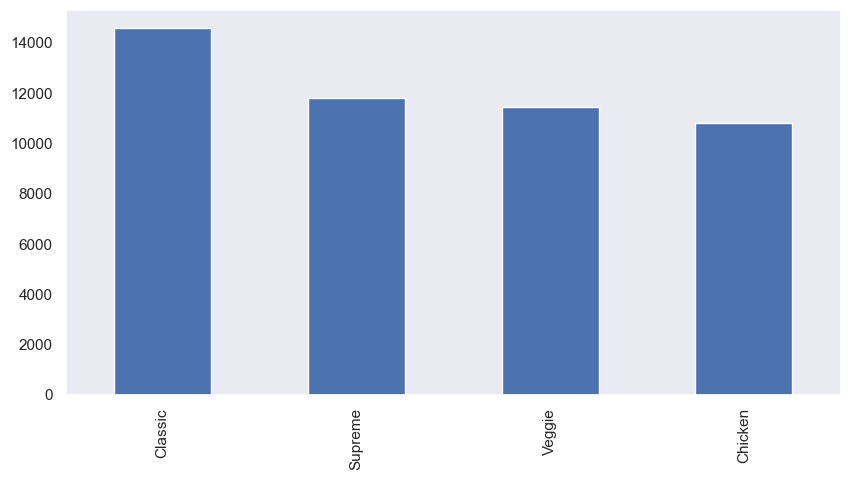

In [7]:
plt.figure(figsize=(10,5))
df['pizza_category'].value_counts().plot(kind='bar')
plt.grid()

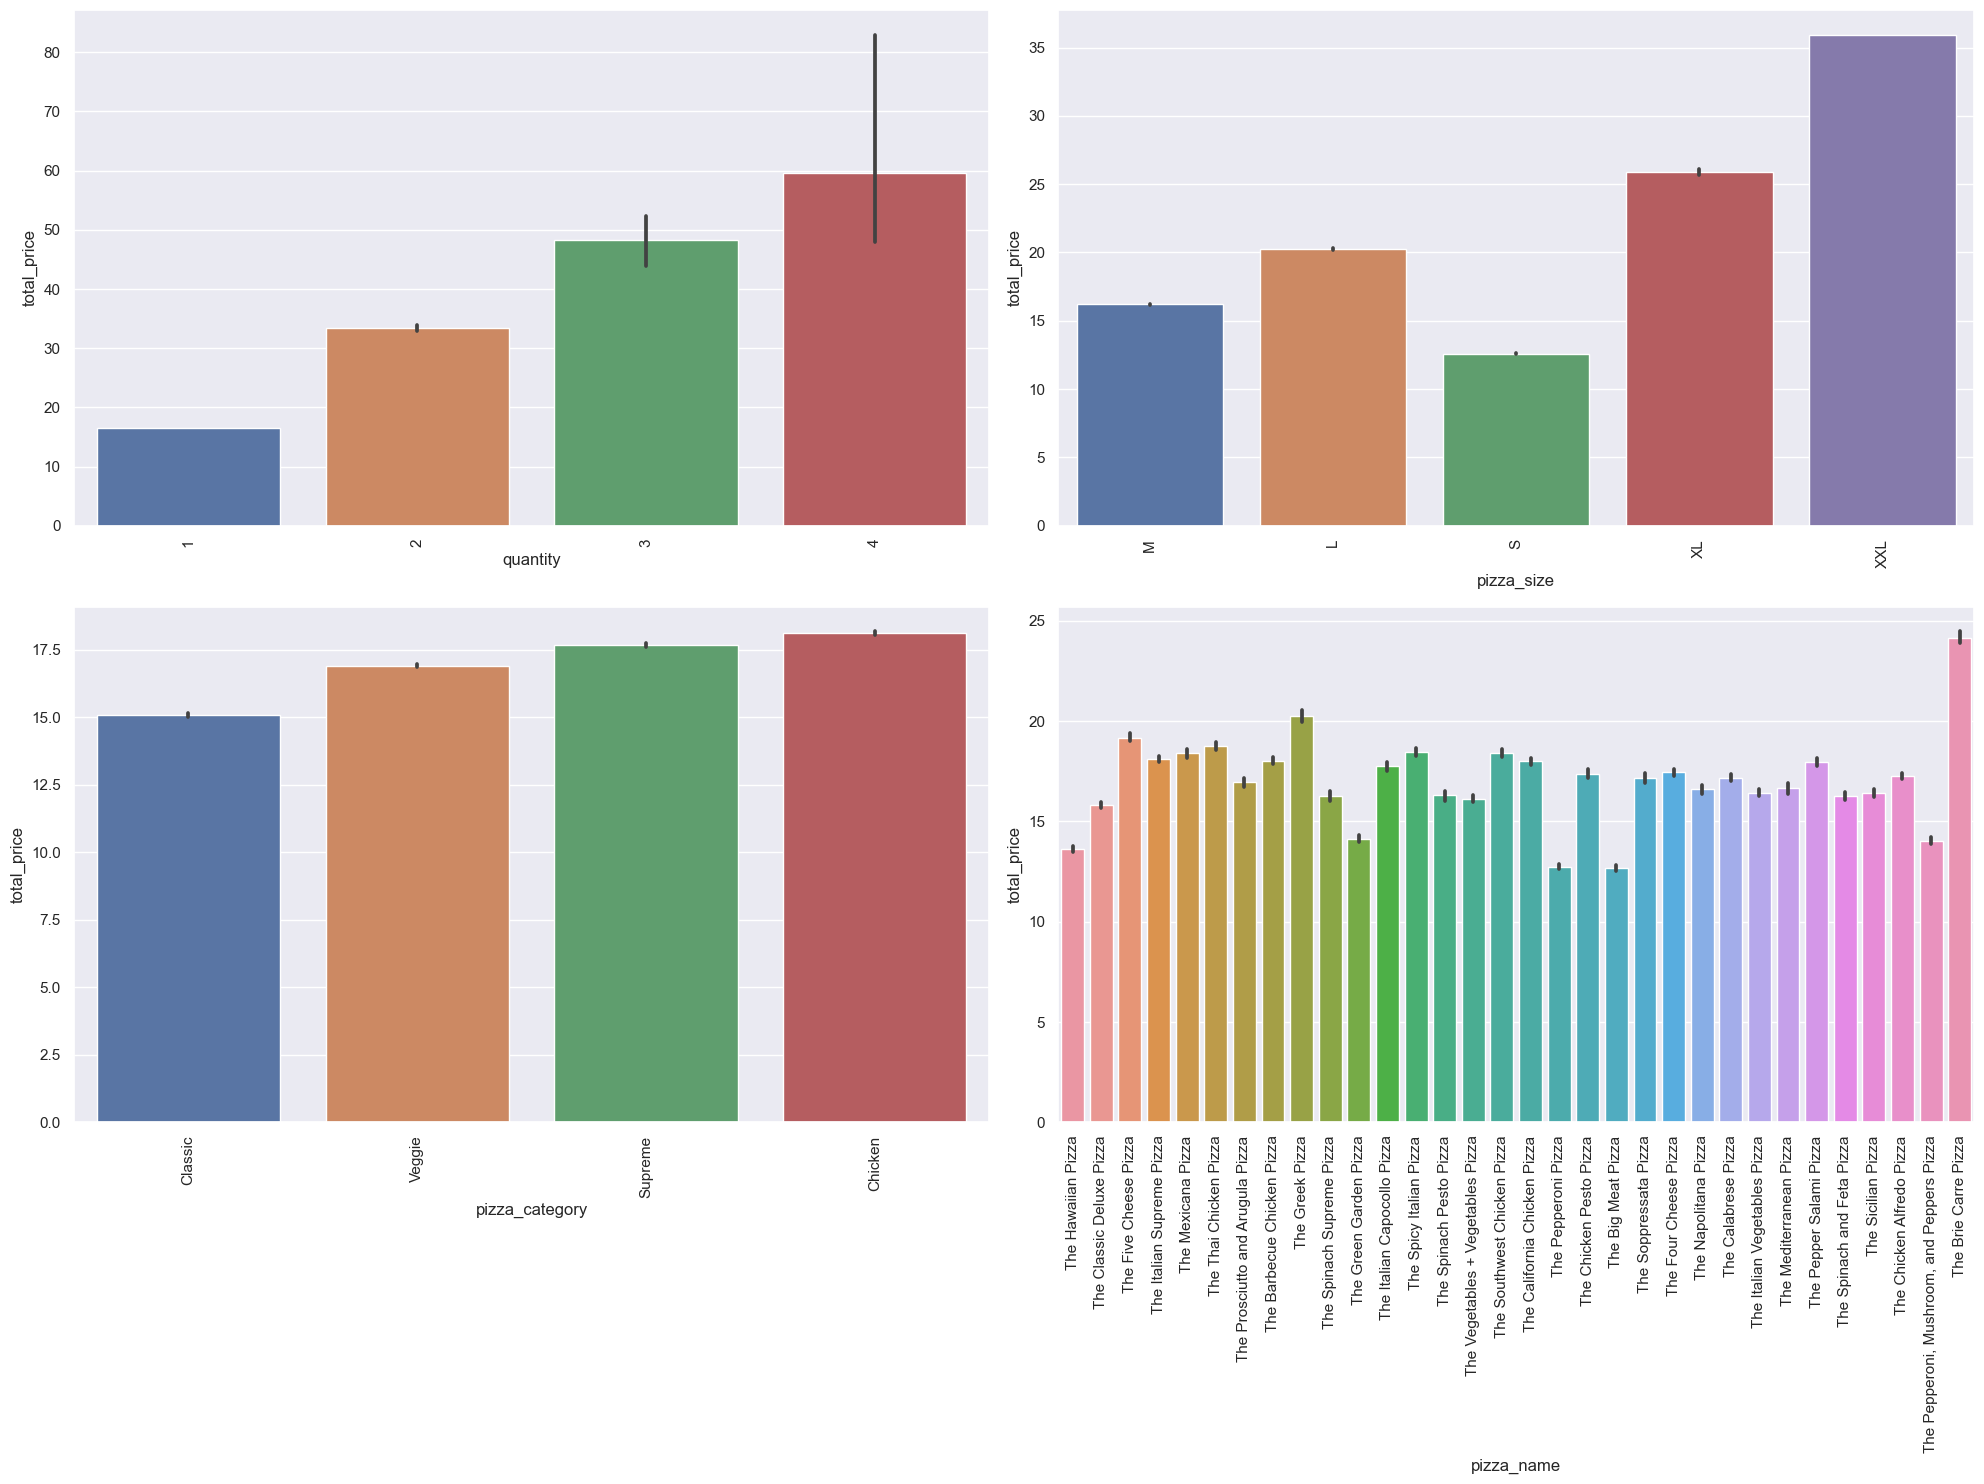

In [8]:
cat_vars = ['quantity','pizza_size','pizza_category','pizza_name']

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(20,15))
axs = axs.ravel()

for i, var in enumerate (cat_vars):
    sns.barplot(x=var , y='total_price',data=df,ax=axs[i],estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
    
fig.tight_layout()
    
plt.show()

<AxesSubplot:xlabel='total_price'>

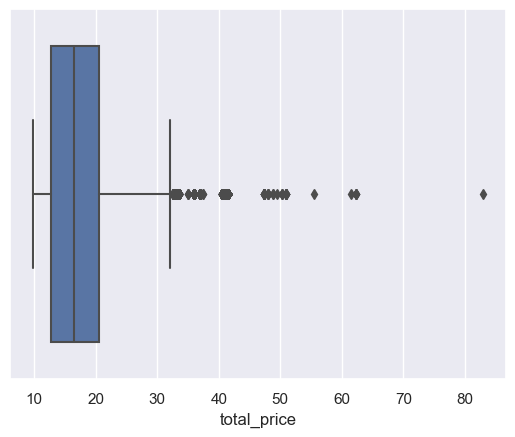

In [14]:
sns.boxplot(x='total_price',data=df)


<AxesSubplot:xlabel='total_price'>

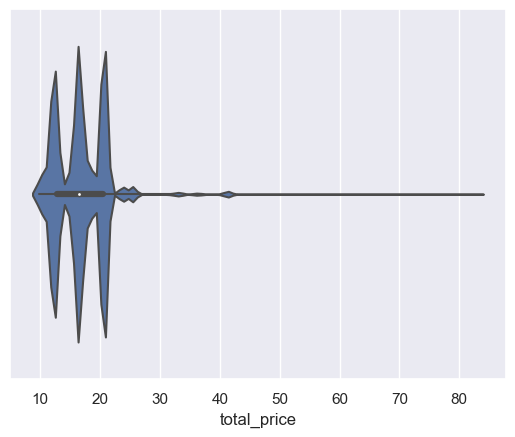

In [15]:
sns.violinplot(x='total_price',data=df)

<AxesSubplot:xlabel='total_price', ylabel='pizza_size'>

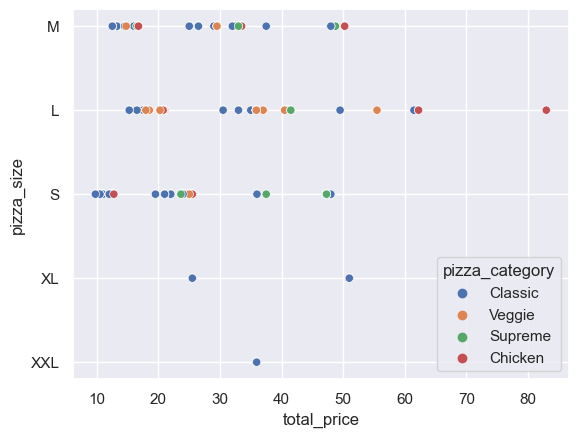

In [16]:
sns.scatterplot(data=df,x='total_price',y='pizza_size',hue='pizza_category')

In [17]:
check_missing= df.isnull().sum()

In [18]:
check_missing

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [32]:
df1 = df.drop(['order_details_id', 'order_id','pizza_id','order_date','order_time','unit_price','pizza_ingredients'], axis=1)

In [33]:
df1

,quantity,total_price,pizza_size,pizza_category,pizza_name
0,1,13.25,M,Classic,The Hawaiian Pizza
1,1,16.00,M,Classic,The Classic Deluxe Pizza
2,1,18.50,L,Veggie,The Five Cheese Pizza
3,1,20.75,L,Supreme,The Italian Supreme Pizza
4,1,16.00,M,Veggie,The Mexicana Pizza
...,...,...,...,...,...
48615,1,16.75,M,Chicken,The Chicken Alfredo Pizza
48616,1,17.95,L,Veggie,The Four Cheese Pizza
48617,1,12.00,S,Classic,The Napolitana Pizza
48618,1,20.25,L,Veggie,The Mexicana Pizza


In [36]:
for col in df1.columns:
    
    print(f"{col}:{df1[col].unique()}")

quantity:[1 2 3 4]
total_price:[13.25 16.   18.5  20.75 16.5  12.75 12.   12.5  20.5  20.25 16.75 15.25
 17.95 16.25 14.75 32.    9.75 17.5  10.5  25.5  11.   14.5  12.25 21.
 62.25 41.5  50.25 23.65 24.   33.5  35.9  25.   19.5  37.5  37.   41.
 33.   40.5  24.5  47.3  22.   35.95 29.   29.5  26.5  48.75 32.5  30.5
 48.   51.   36.   35.   83.   61.5  49.5  55.5 ]
pizza_size:['M' 'L' 'S' 'XL' 'XXL']
pizza_category:['Classic' 'Veggie' 'Supreme' 'Chicken']
pizza_name:['The Hawaiian Pizza' 'The Classic Deluxe Pizza' 'The Five Cheese Pizza'
 'The Italian Supreme Pizza' 'The Mexicana Pizza' 'The Thai Chicken Pizza'
 'The Prosciutto and Arugula Pizza' 'The Barbecue Chicken Pizza'
 'The Greek Pizza' 'The Spinach Supreme Pizza' 'The Green Garden Pizza'
 'The Italian Capocollo Pizza' 'The Spicy Italian Pizza'
 'The Spinach Pesto Pizza' 'The Vegetables + Vegetables Pizza'
 'The Southwest Chicken Pizza' 'The California Chicken Pizza'
 'The Pepperoni Pizza' 'The Chicken Pesto Pizza' 'The Big Meat

In [35]:
from sklearn import preprocessing 

In [37]:
for col in df1.columns:
    
    label_encoder = preprocessing.LabelEncoder()
    
    label_encoder.fit(df1[col].unique())
    
    df1[col]=label_encoder.transform(df1[col])
    
    print(f"{col}:{df1[col].unique()}")

quantity:[0 1 2 3]
total_price:[ 7 11 17 21 13  6  3  5 20 19 14 10 16 12  9 33  0 15  1 28  2  8  4 22
 54 45 50 24 25 36 38 27 18 42 41 44 35 43 26 46 23 39 30 31 29 48 34 32
 47 51 40 37 55 53 49 52]
pizza_size:[1 0 2 3 4]
pizza_category:[1 3 2 0]
pizza_name:[12  7  8 14 17 30 22  0 10 28 11 13 26 27 31 25  4 20  6  1 24  9 18  3
 15 16 19 29 23  5 21  2]


<AxesSubplot:>

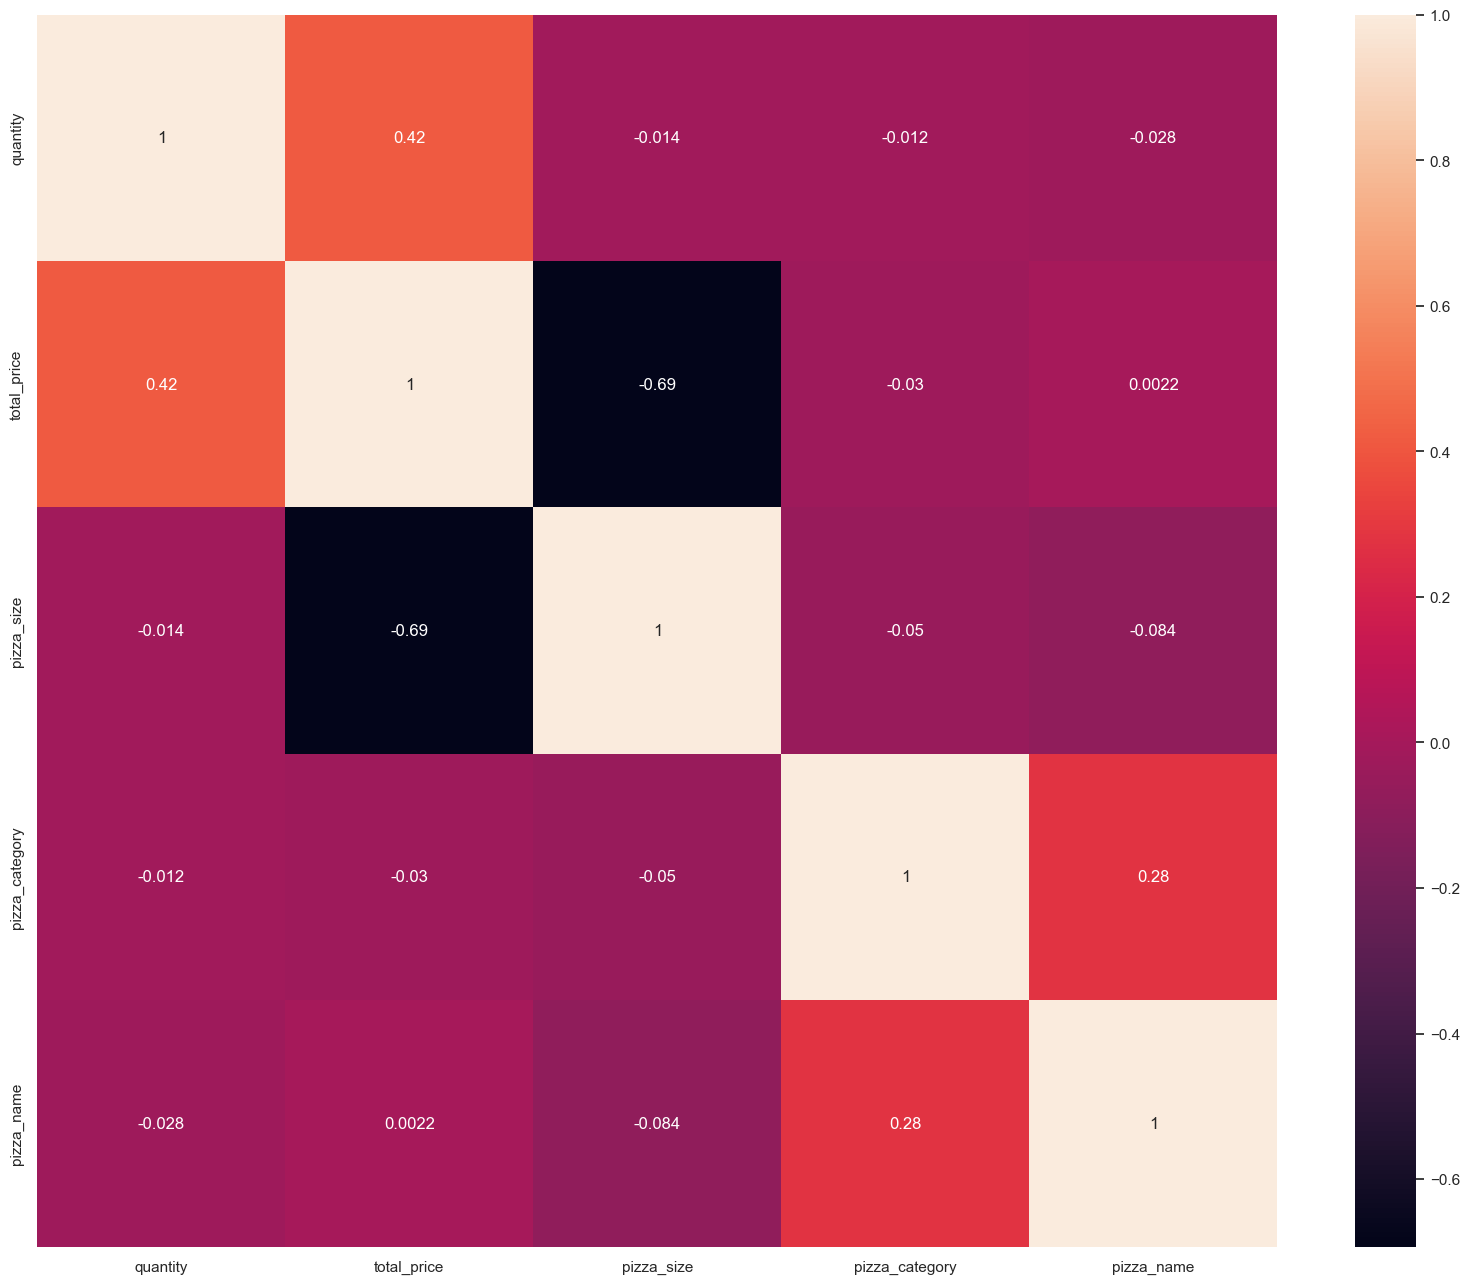

In [39]:
plt.figure(figsize=(20,16))
sns.heatmap(df1.corr(),fmt='.2g',annot=True)